In [3]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [4]:
df1 = pd.read_csv('../output/etl_sola.csv',encoding='CP932')
df2 = pd.read_csv('../output/etl_forecast_kanagawa.csv',encoding='CP932')

In [5]:
k_USE_COLS = ['date','M30']
x_USE_COLS = ['M30','D365','we','tp','weather','weather_detail']

In [6]:
y_USE_COLS = ['SOLA01']

In [7]:
df2 = df2.applymap(lambda x : 0 if pd.isnull(x) else x)
df2.head()

date  M30 weather   weather_detail        wind  min_tp  max_tp   we  \
0  20120101    1     くもり  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   
1  20120101    2     くもり  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   
2  20120101    3     くもり  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   
3  20120101    4     くもり  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   
4  20120101    5     くもり  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   

   tp wv  wc      wind.1  pc  
0   5  北   2  北の風　後　南西の風   0  
1   5  北   2  北の風　後　南西の風   0  
2   5  北   2  北の風　後　南西の風   0  
3   5  北   2  北の風　後　南西の風   0  
4   5  北   2  北の風　後　南西の風   0

In [8]:
df = pd.merge(df1,df2,on=['date','M30'])
df.head()

date  M12  D365  M30  SOLA01  SOLA02  SOLA02.1 weather  \
0  20120101    1     1    1       0     0.0       0.0     くもり   
1  20120101    1     1    2       0     0.0       0.0     くもり   
2  20120101    1     1    3       0     0.0       0.0     くもり   
3  20120101    1     1    4       0     0.0       0.0     くもり   
4  20120101    1     1    5       0     0.0       0.0     くもり   

    weather_detail        wind  min_tp  max_tp   we  tp wv  wc      wind.1  pc  
0  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   5  北   2  北の風　後　南西の風   0  
1  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   5  北   2  北の風　後　南西の風   0  
2  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   5  北   2  北の風　後　南西の風   0  
3  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   5  北   2  北の風　後　南西の風   0  
4  くもり　所により　朝晩　雨か雪  北の風　後　南西の風       3      10  くもり   5  北   2  北の風　後　南西の風   0

In [9]:
class_le = LabelEncoder()
df['we'] = class_le.fit_transform(df['we'].values)
df['wv'] = class_le.fit_transform(df['wv'].values)
df['weather'] = class_le.fit_transform(df['weather'].values)
df['weather_detail'] = class_le.fit_transform(df['weather_detail'].values)
df['wind'] = class_le.fit_transform(df['wind'].values)
df.head()

date  M12  D365  M30  SOLA01  SOLA02  SOLA02.1  weather  \
0  20120101    1     1    1       0     0.0       0.0        0   
1  20120101    1     1    2       0     0.0       0.0        0   
2  20120101    1     1    3       0     0.0       0.0        0   
3  20120101    1     1    4       0     0.0       0.0        0   
4  20120101    1     1    5       0     0.0       0.0        0   

   weather_detail  wind  min_tp  max_tp  we  tp  wv  wc      wind.1  pc  
0              60    61       3      10   0   5   0   2  北の風　後　南西の風   0  
1              60    61       3      10   0   5   0   2  北の風　後　南西の風   0  
2              60    61       3      10   0   5   0   2  北の風　後　南西の風   0  
3              60    61       3      10   0   5   0   2  北の風　後　南西の風   0  
4              60    61       3      10   0   5   0   2  北の風　後　南西の風   0

In [10]:
key_t = df.date.drop_duplicates().sample(frac = 0.2)
df_test, df_train = df[df.date.isin(key_t)],df[df.date.isin(key_t) == False]

X_train = df_train[x_USE_COLS]
Y_train = df_train[y_USE_COLS]

X_test = df_test[x_USE_COLS]
Y_test = df_test[y_USE_COLS]

In [11]:
rfr = RandomForestRegressor()
rfr.n_estimator = 500
rfr.max_depth = 11
rfr.fit(X_train, Y_train)  
rfr_y_predict = rfr.predict(X_test)  
print(rfr.score(X_test, Y_test))
print(mean_absolute_error(Y_test, rfr_y_predict))

C:\Users\BAB1503408\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.843274310652
166.443145772


In [12]:
df_plt = df_test.copy()
df_plt['predict'] = rfr_y_predict
df_plt.sort_values(by=['date','M30'],inplace=True)

x = list(range(1,49))

df_plt.head()

date  M12  D365  M30  SOLA01  SOLA02  SOLA02.1  weather  \
384  20120109    1     9    1       0     0.0       0.0        7   
385  20120109    1     9    2       0     0.0       0.0        7   
386  20120109    1     9    3       0     0.0       0.0        7   
387  20120109    1     9    4       0     0.0       0.0        7   
388  20120109    1     9    5       0     0.0       0.0        7   

     weather_detail  wind  min_tp  max_tp  we  tp  wv  wc       wind.1  pc  \
384             107    93       3      11   0   5   0   2  北の風　日中　北東の風   0   
385             107    93       3      11   0   5   0   2  北の風　日中　北東の風   0   
386             107    93       3      11   0   5   0   2  北の風　日中　北東の風   0   
387             107    93       3      11   0   5   0   2  北の風　日中　北東の風   0   
388             107    93       3      11   0   5   0   2  北の風　日中　北東の風   0   

     predict  
384      0.0  
385      0.0  
386      0.0  
387      0.0  
388      0.0

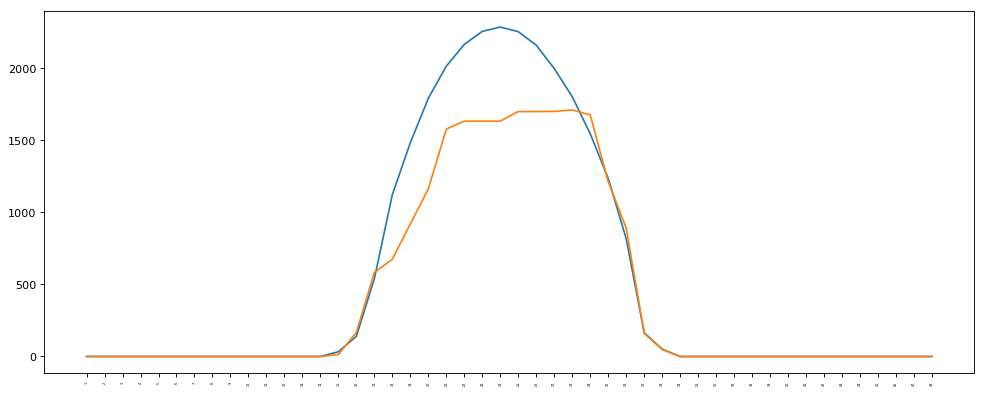

In [15]:
y1 = df_plt[df_plt.date == 20120109]['SOLA01']
y2 = df_plt[df_plt.date == 20120109]['predict']

plt.figure(figsize=(15,6),dpi=80)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x,x,size='3',rotation=90)
plt.show()

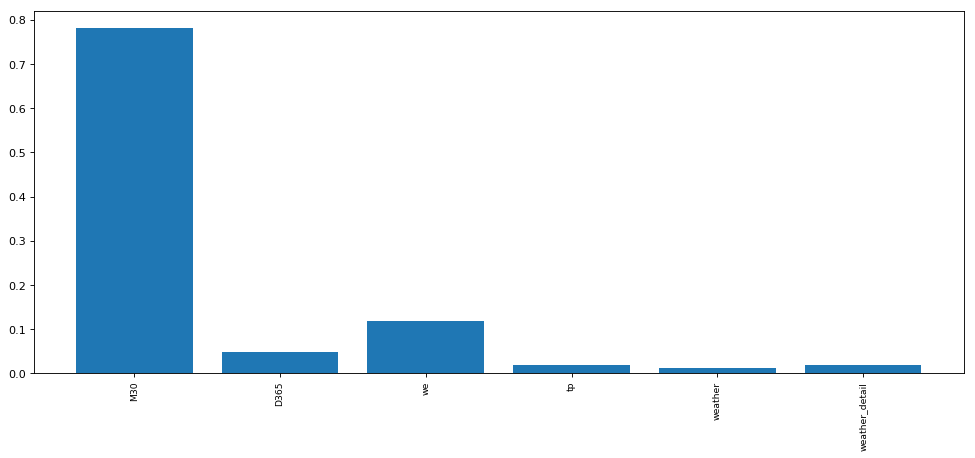

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6),dpi=80)
plt.bar(range(len(rfr.feature_importances_)),rfr.feature_importances_)
plt.xticks(range(len(rfr.feature_importances_)),X_train.columns,size='small',rotation=90)
plt.show()


In [17]:
gbr = GradientBoostingRegressor()  
gbr.max_depth = 5
gbr.fit(X_train, Y_train)  
gbr_y_predict = gbr.predict(X_test)
print(gbr.score(X_test, Y_test)) 
print(mean_absolute_error(Y_test, gbr_y_predict))

C:\Users\BAB1503408\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.853832887349
177.50857978
